In [34]:
import pandas as pd 
import os
import matplotlib.pyplot as plt

In [35]:
# read all csv data files into dataframe
directory = './data'

# List all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Read and concatenate all CSV files into one DataFrame
combined_df = pd.concat([pd.read_csv(os.path.join(directory, file)) for file in csv_files], ignore_index=True)

# Display the resulting DataFrame
print(combined_df)

       Unnamed: 0   trade_id product_id    price      size  \
0               0  568641703    ETH-USD  3166.52  0.000382   
1               1  372315977    ETH-USD  3166.80  0.006669   
2               2  568641701    ETH-USD  3166.78  0.063145   
3               3  568641702    ETH-USD  3166.72  0.252554   
4               4  568641699    ETH-USD  3167.35  0.000016   
...           ...        ...        ...      ...       ...   
47790         995  568638273    ETH-USD  3161.43  0.278087   
47791         996  568638267    ETH-USD  3161.31  0.004377   
47792         997  568638268    ETH-USD  3161.32  2.751649   
47793         998  568638269    ETH-USD  3161.34  0.000433   
47794         999  568638270    ETH-USD  3161.34  0.026621   

                              time  side  bid  ask  exchange  
0      2024-11-18T19:05:08.784191Z  SELL  NaN  NaN       NaN  
1         2024-11-18T19:05:08.599Z  SELL  NaN  NaN       NaN  
2      2024-11-18T19:05:07.749732Z   BUY  NaN  NaN       NaN  
3  

In [36]:
#fix timestamps
combined_df = combined_df.dropna(subset=['time'])  # Remove rows where 'time' couldn't be parsed
combined_df['time'] = pd.to_datetime(combined_df['time'], errors='coerce')  # Automatically handle various formats and handle parsing errors

#drop unused columns
cleaned_df = combined_df.drop(columns=['bid', 'ask', 'exchange'], axis=1)
cleaned_df

,Unnamed: 0,trade_id,product_id,price,size,time,side
0,0,568641703,ETH-USD,3166.52,0.000382,2024-11-18 19:05:08.784191+00:00,SELL
1,1,372315977,ETH-USD,3166.80,0.006669,2024-11-18 19:05:08.599000+00:00,SELL
2,2,568641701,ETH-USD,3166.78,0.063145,2024-11-18 19:05:07.749732+00:00,BUY
3,3,568641702,ETH-USD,3166.72,0.252554,2024-11-18 19:05:07.749732+00:00,BUY
4,4,568641699,ETH-USD,3167.35,0.000016,2024-11-18 19:05:06.745798+00:00,BUY
...,...,...,...,...,...,...,...
47790,995,568638273,ETH-USD,3161.43,0.278087,2024-11-18 18:54:26.567626+00:00,SELL
47791,996,568638267,ETH-USD,3161.31,0.004377,2024-11-18 18:54:26.566125+00:00,SELL
47792,997,568638268,ETH-USD,3161.32,2.751649,2024-11-18 18:54:26.566125+00:00,SELL
47793,998,568638269,ETH-USD,3161.34,0.000433,2024-11-18 18:54:26.566125+00:00,SELL


In [39]:
#drop incomplete rows
df = cleaned_df.dropna()
df

,Unnamed: 0,trade_id,product_id,price,size,time,side
0,0,568641703,ETH-USD,3166.52,0.000382,2024-11-18 19:05:08.784191+00:00,SELL
1,1,372315977,ETH-USD,3166.80,0.006669,2024-11-18 19:05:08.599000+00:00,SELL
2,2,568641701,ETH-USD,3166.78,0.063145,2024-11-18 19:05:07.749732+00:00,BUY
3,3,568641702,ETH-USD,3166.72,0.252554,2024-11-18 19:05:07.749732+00:00,BUY
4,4,568641699,ETH-USD,3167.35,0.000016,2024-11-18 19:05:06.745798+00:00,BUY
...,...,...,...,...,...,...,...
47790,995,568638273,ETH-USD,3161.43,0.278087,2024-11-18 18:54:26.567626+00:00,SELL
47791,996,568638267,ETH-USD,3161.31,0.004377,2024-11-18 18:54:26.566125+00:00,SELL
47792,997,568638268,ETH-USD,3161.32,2.751649,2024-11-18 18:54:26.566125+00:00,SELL
47793,998,568638269,ETH-USD,3161.34,0.000433,2024-11-18 18:54:26.566125+00:00,SELL


In [43]:
#sort data by time
# Ensure the 'time' column is a datetime object
df['time'] = pd.to_datetime(df['time'])

# Sort the DataFrame by the time column
df_sorted = df.sort_values(by='time')

/var/folders/1f/5lhk7sb97rz53v7gk1vkcjkr0000gn/T/ipykernel_84458/1038420789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'])


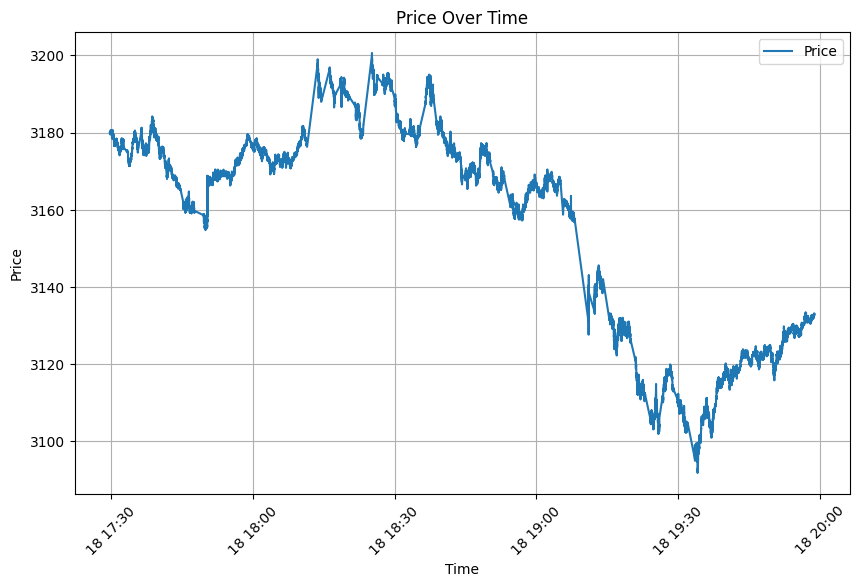

In [44]:
#print graph of data
# Assuming 'df' is your DataFrame
df_sorted['price'] = pd.to_numeric(df_sorted['price'])  # Convert 'price' to numeric if needed

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['time'], df_sorted['price'], linestyle='-', label='Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Price Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.show()

In [45]:
df_sorted.to_csv('preprocessed_dataset.csv')